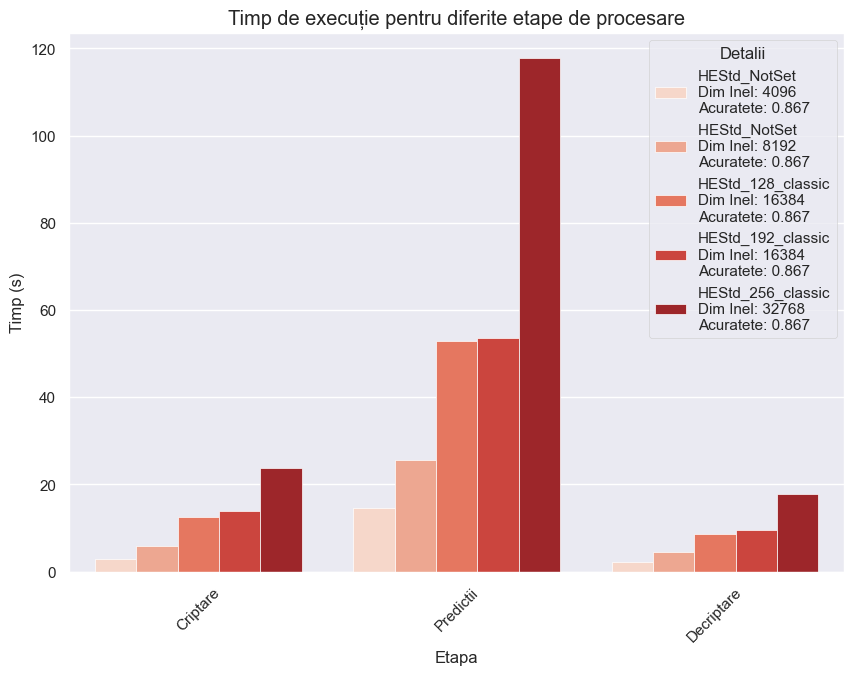

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = [
    ("HEStd_NotSet", 4096, 2.8747429100010775, 14.573816010399606, 2.2272443850015406, 0.8673796908323975),
    ("HEStd_NotSet ", 8192, 5.787615904799895, 25.660830002198054, 4.381745896398206, 0.8673796908289919),
    ("HEStd_128_classic", 16384, 12.414008122199448, 52.7766469226015, 8.681446001199948, 0.8673796908294509),
    ("HEStd_192_classic", 16384, 13.865444027599006, 53.50295394300046, 9.52702609479893, 0.867379690836426),
    ("HEStd_256_classic", 32768, 23.694000112199448, 117.7766469226015, 17.681446001199948, 0.8673796908294509)
]

df = pd.DataFrame(data, columns=["Securitate", "Dimensiune inel", "Criptare", "Predictii", "Decriptare", "Acuratete"])

df_melted = df.melt(id_vars=["Securitate", "Dimensiune inel", "Acuratete"],
                    value_vars=["Criptare", "Predictii", "Decriptare"],
                    var_name="Etapa",
                    value_name="Timp (s)")

plt.figure(figsize=(10, 7))
sns.set_style("darkgrid")
sns.barplot(data=df_melted, x="Etapa", y="Timp (s)", hue="Securitate", palette="Reds", errorbar=None)
plt.title("Timp de execuție pentru diferite etape de procesare")

handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [f"{s}\nDim Inel: {di}\nAcuratete: {ac:.3f}" for s, di, ac in zip(df["Securitate"], df["Dimensiune inel"], df["Acuratete"])]
plt.legend(handles, new_labels, title="Detalii")

plt.xticks(rotation=45)
plt.savefig("./graf_comparatii_securitate.png")
plt.show()

